In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s5e8/train.csv')
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [6]:
df = df.drop('id', axis=1)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [8]:
df[df['balance'] < 0].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26,40,management,married,tertiary,no,-205,yes,yes,cellular,10,jul,122,1,-1,0,unknown,0
37,33,services,single,secondary,no,-68,yes,no,cellular,2,feb,393,1,252,1,failure,0
38,46,admin.,married,secondary,no,-314,yes,no,cellular,18,may,66,3,-1,0,unknown,0
40,46,technician,divorced,secondary,no,-90,no,no,unknown,13,may,415,1,-1,0,unknown,0
43,32,blue-collar,married,secondary,yes,-258,yes,no,unknown,23,jun,151,2,-1,0,unknown,0


In [9]:
print(df[df['balance'] < 0].shape)

(104645, 17)


There are many overdraft accounts. **`This could be a new categorical feature`**.

In [10]:
df[df['balance'] >= 10000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
31,40,management,married,secondary,no,16125,yes,no,telephone,17,nov,89,1,-1,0,unknown,0
61,57,technician,married,secondary,no,14170,no,no,cellular,5,aug,965,2,-1,0,unknown,0
78,28,student,single,unknown,no,10583,no,no,cellular,8,jun,119,8,-1,0,unknown,1
86,43,management,married,tertiary,no,13044,no,no,cellular,18,aug,243,4,-1,0,unknown,0
207,31,management,single,tertiary,no,12956,yes,no,cellular,5,feb,1136,3,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749710,37,management,married,tertiary,no,12686,yes,no,cellular,18,may,707,1,178,1,failure,0
749757,28,admin.,single,secondary,no,11862,no,no,cellular,3,jun,280,1,-1,0,unknown,0
749889,53,management,married,tertiary,no,17118,yes,no,cellular,19,nov,102,1,-1,0,unknown,0
749957,37,management,married,tertiary,no,13893,no,no,unknown,11,jun,49,1,-1,0,unknown,0


Just 9000 rows out of 750,000 have balance greater than 10,000, these are all outliers.

In [11]:
df['overdraft'] = ['yes' if balance < 0 else 'no' for balance in df['balance']]

Separating numeric and categorical features:

In [12]:
num_features = df.select_dtypes(include='int').columns.tolist()
cat_features = df.select_dtypes(include='object').columns.tolist()

print(num_features)
print(cat_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'overdraft']


In [13]:
target = 'y'
num_features.remove('y')
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [14]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
overdraft    0
dtype: int64

In [15]:
def plot_num(cols):
    for col in cols:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        sns.histplot(df[col], bins=30, ax=ax1)
        ax1.set_title(f'Histogram of {col}')
        
        sns.boxplot(x=df[col], ax=ax2)
        ax2.set_title(f'Boxplot of {col}')

        # plt.tight_layout()
        plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


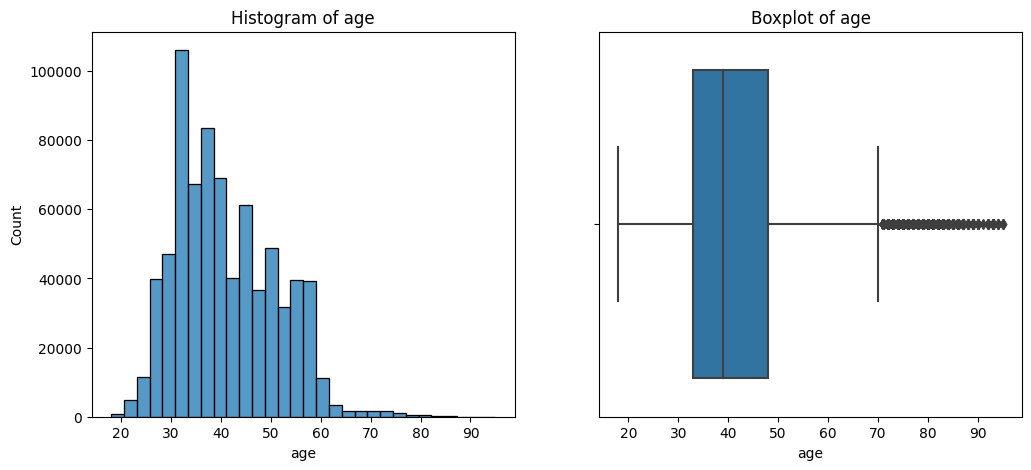

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


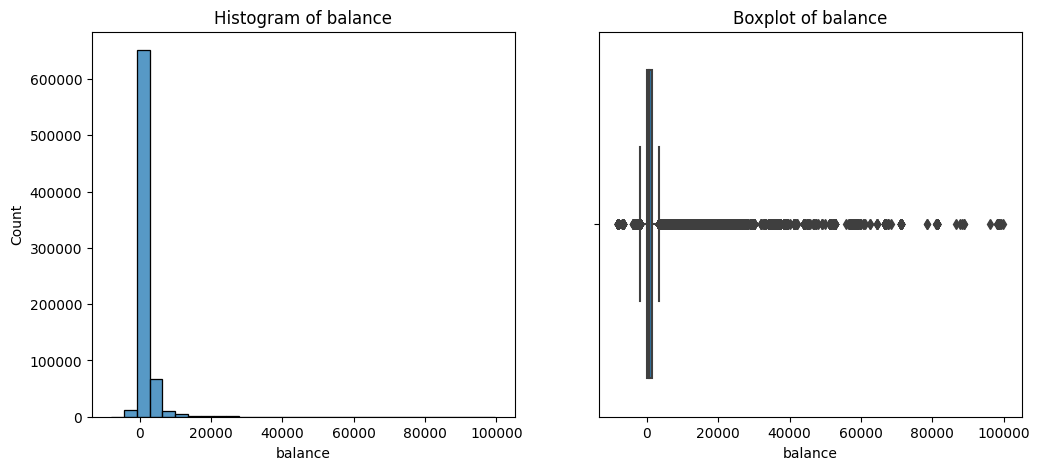

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


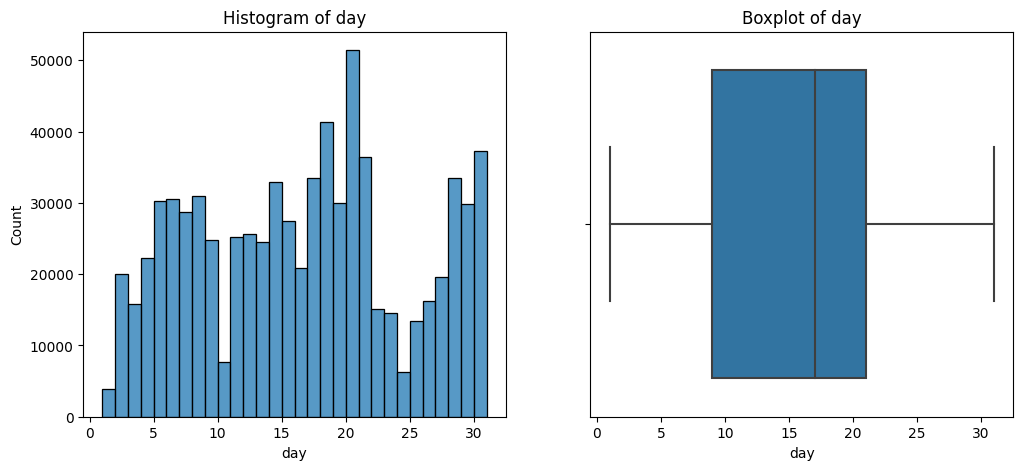

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


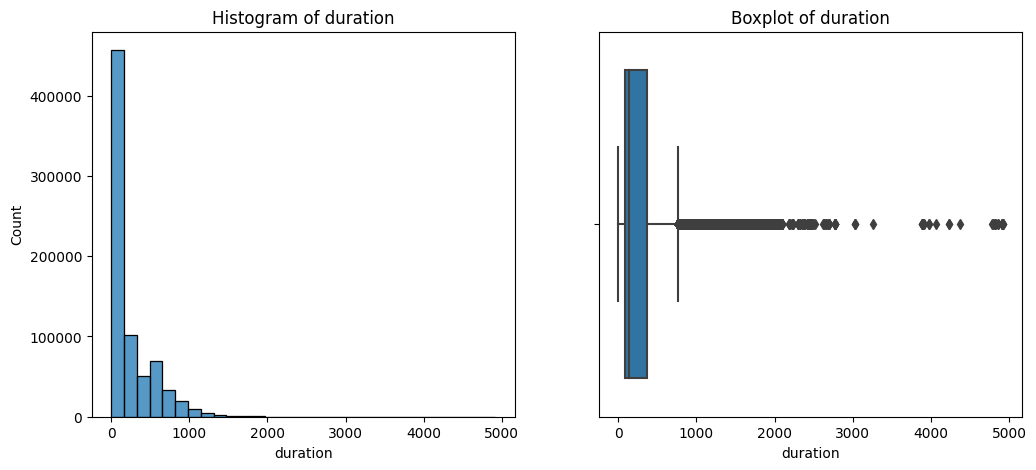

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


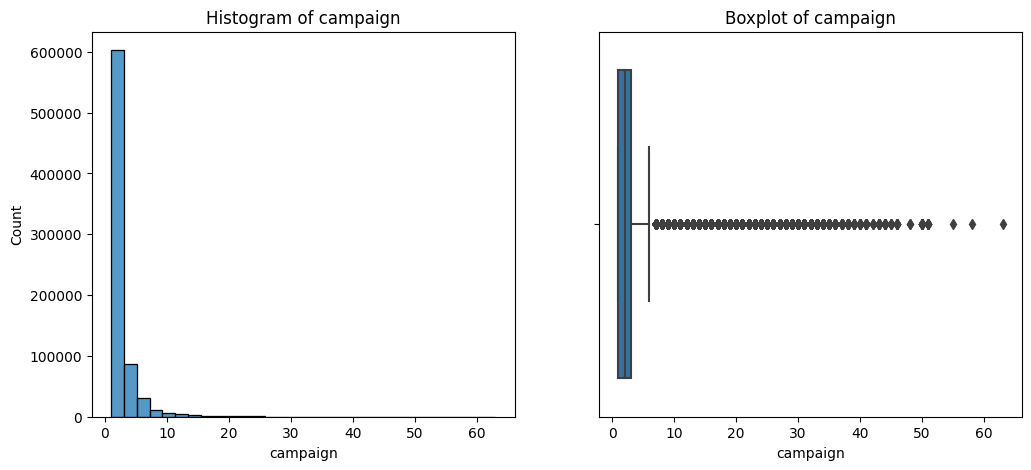

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


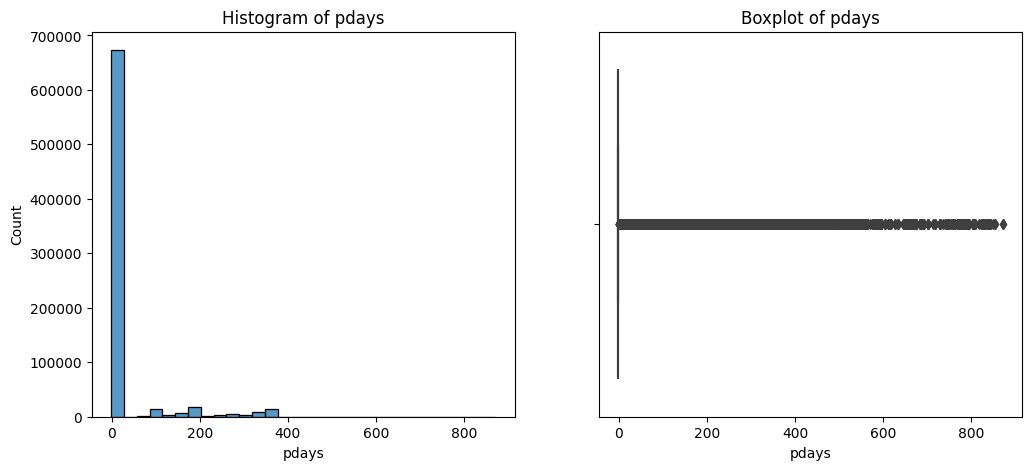

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


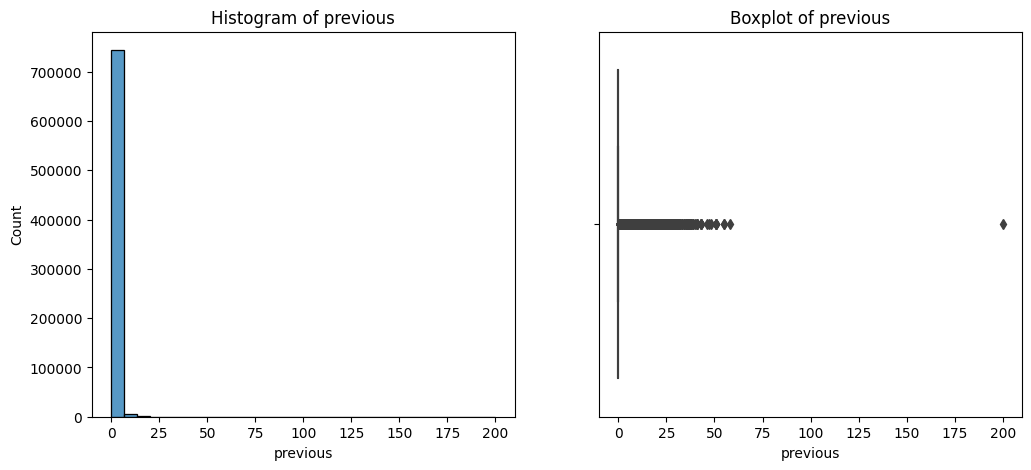

In [16]:
plot_num(num_features)

Almost all the numeric features are highly right-skewed, I think a power-transformation (or log) might be a good choice here.

Since balance has negative values as well, I can use Yeo-Johnson power transformation.

In [17]:
def plot_cat(cols):
    for col in cols:
        figure = plt.figure(figsize=(12, 5))
        sns.countplot(x=df[col], order = df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"Frequency plot of {col}")
        plt.show()

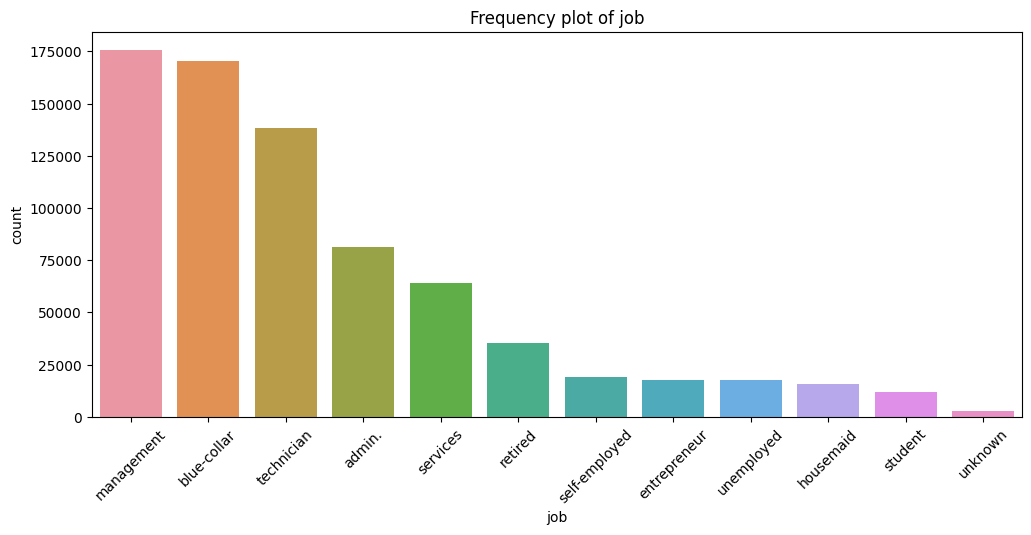

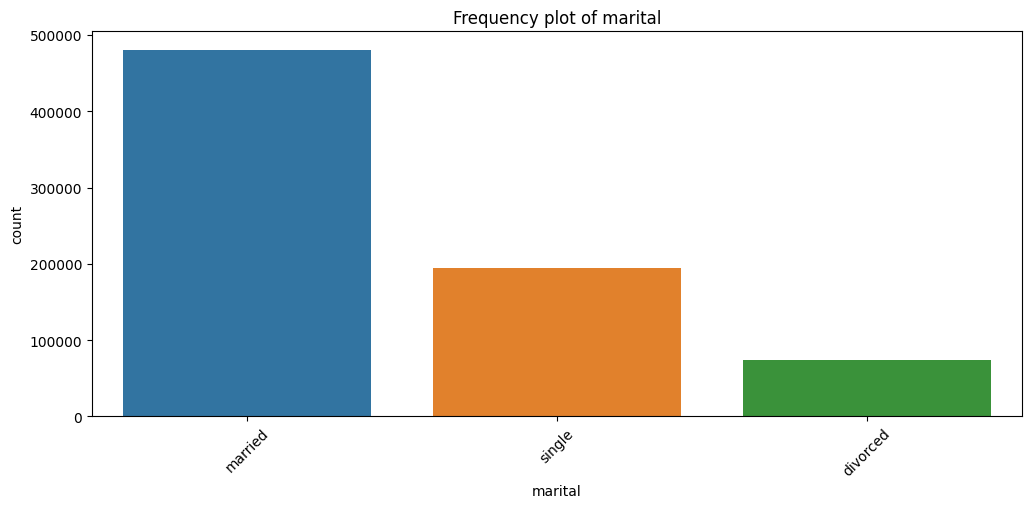

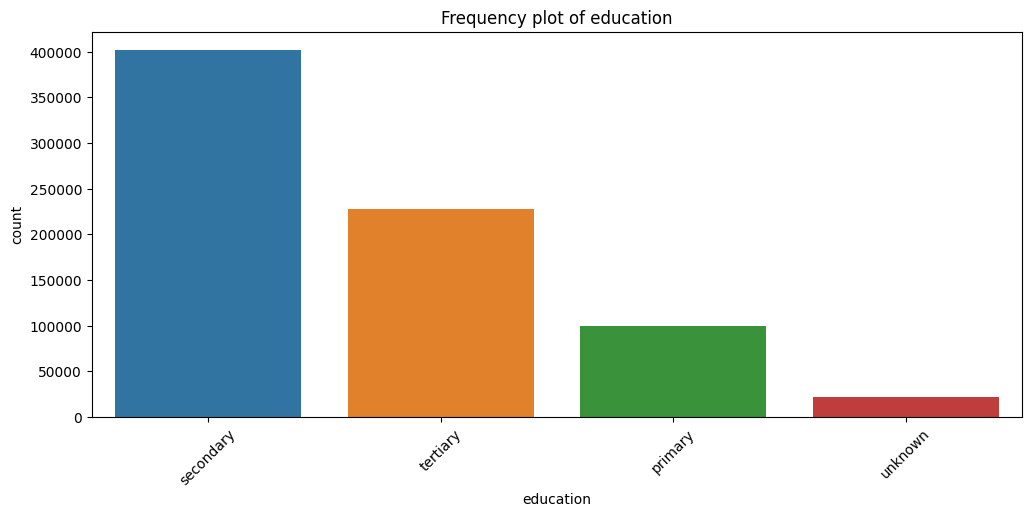

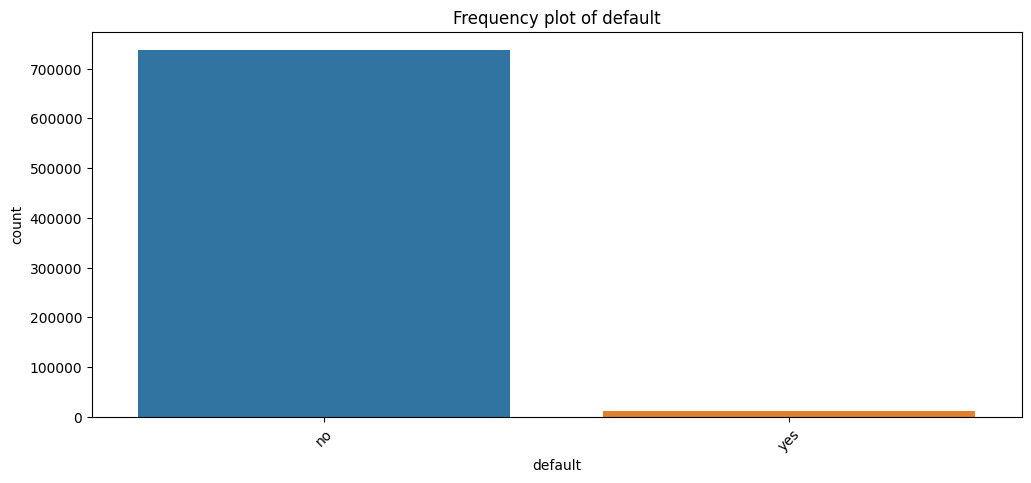

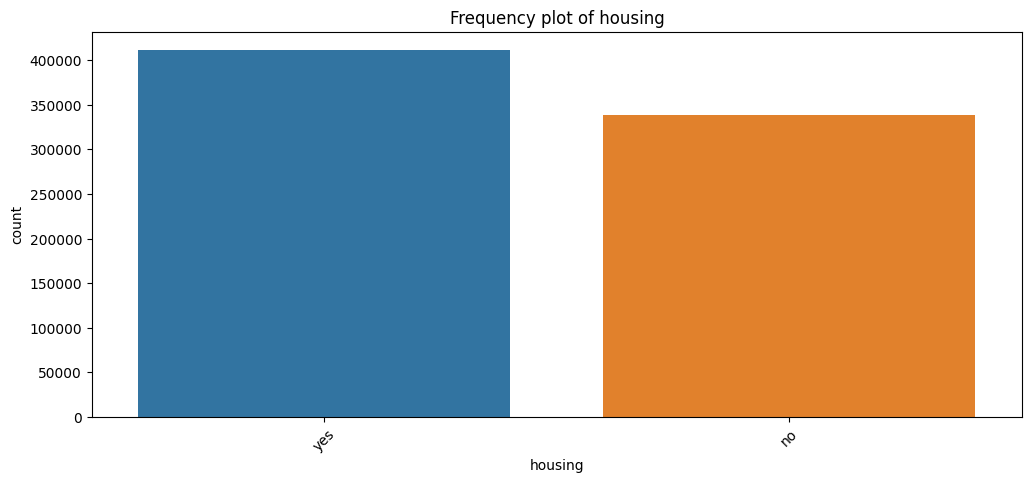

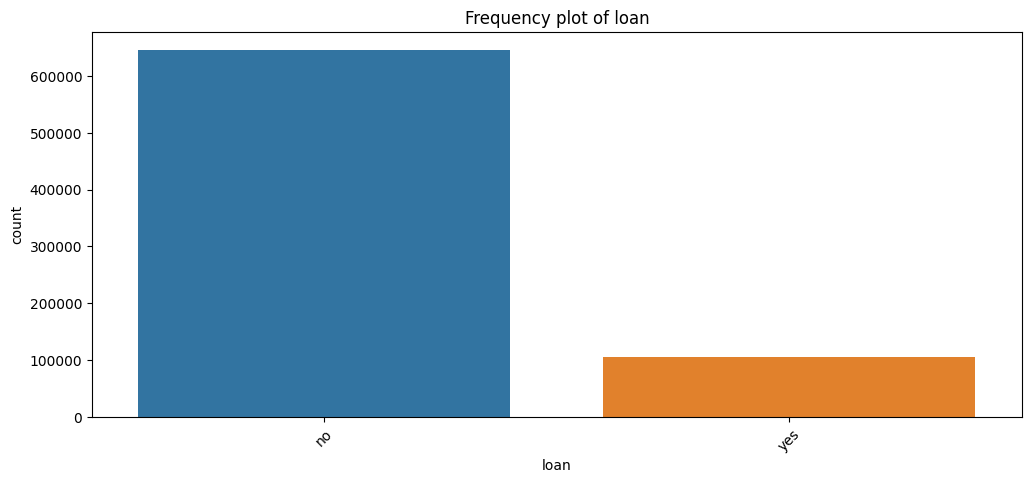

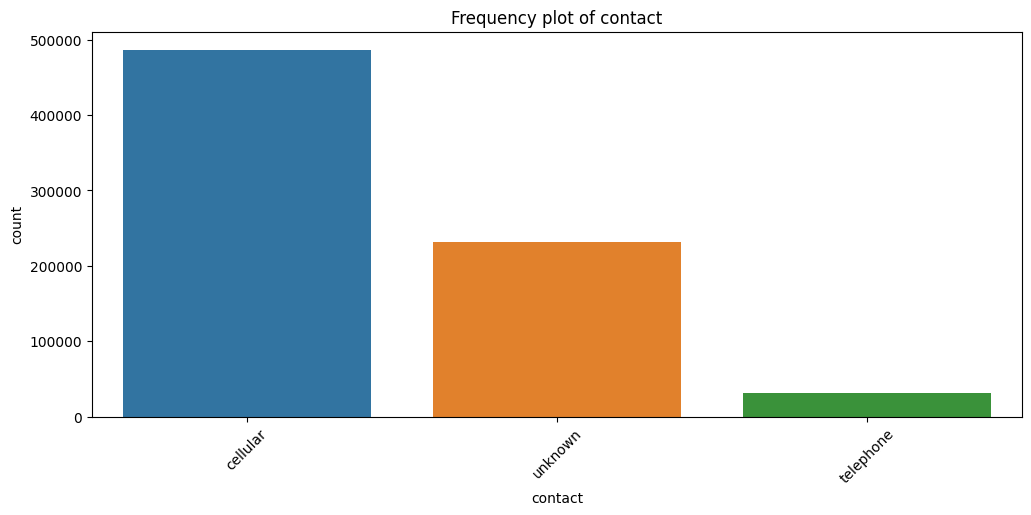

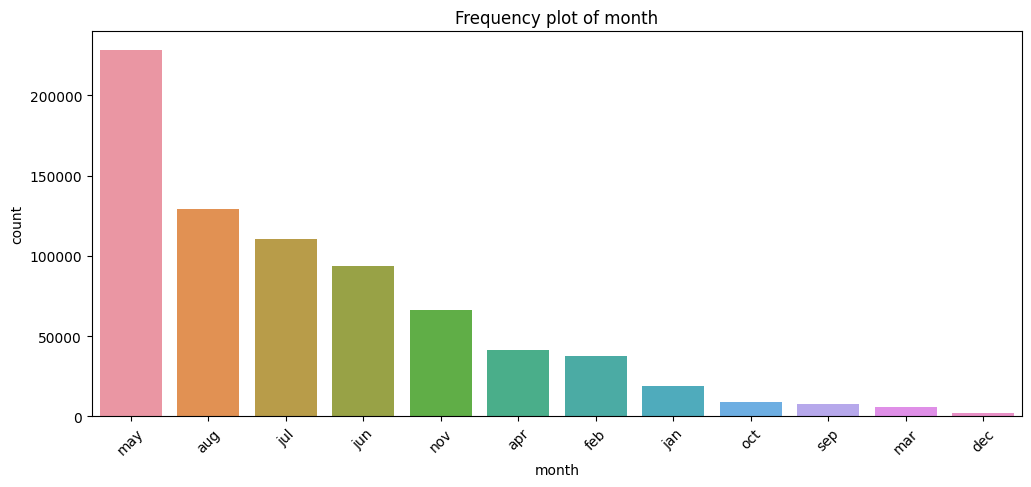

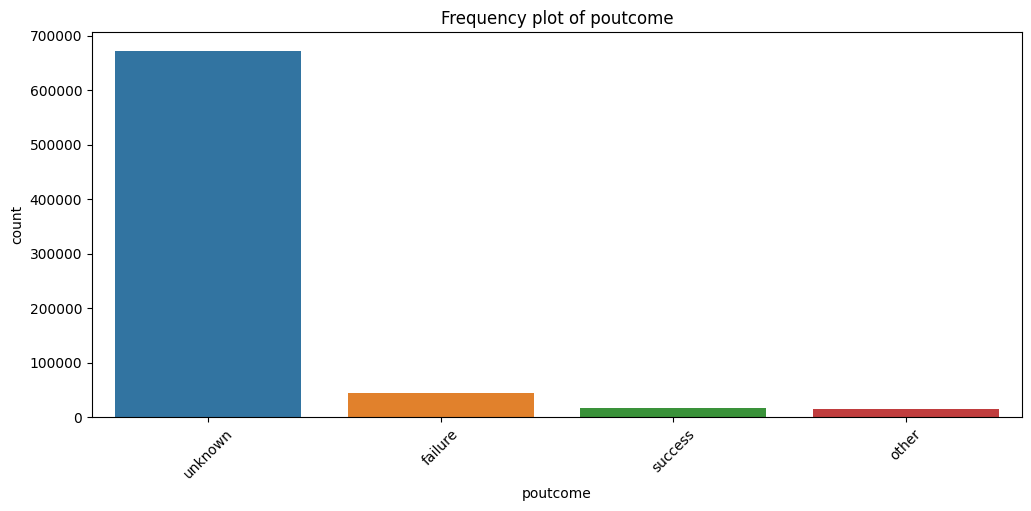

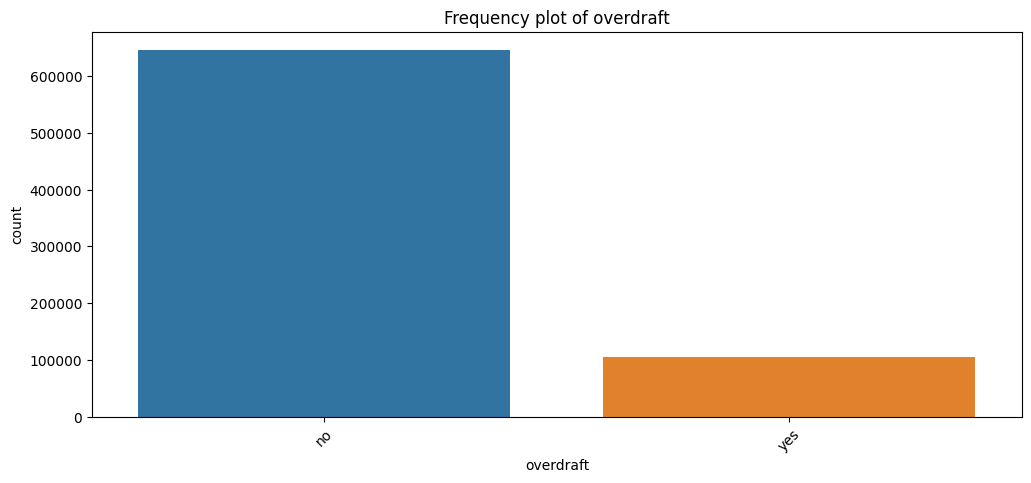

In [18]:
plot_cat(cat_features)

Some features have high imbalance like default and poutcome.

Replacing month name with month number:

In [19]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month_num'] = df['month'].str.lower().map(month_map)
df = df.drop('month', axis=1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [21]:
X = df.drop('y', axis=1)
y = df['y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [23]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,overdraft,month_num
385296,53,self-employed,married,secondary,no,5,yes,no,cellular,21,53,1,-1,0,unknown,no,11
696342,40,entrepreneur,married,primary,no,759,no,no,cellular,20,68,1,-1,0,unknown,no,11
350451,53,admin.,married,secondary,no,1473,yes,yes,cellular,20,509,2,-1,0,unknown,no,11
545334,24,technician,single,secondary,no,855,yes,no,cellular,16,1205,1,-1,0,unknown,no,4
138700,49,admin.,married,secondary,no,2058,no,no,cellular,30,1842,1,-1,0,unknown,no,4


In [24]:
num_features.append('month_num')
cat_features.remove('month')

Preprocessing features

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [29]:
num_pipe = Pipeline(
    [
        ('impute', SimpleImputer(strategy='median')),
        ('transform', PowerTransformer(method="yeo-johnson")),
        ('scale', StandardScaler())
    ]
)

cat_pipe = Pipeline(
    [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

In [30]:
preprocessor = ColumnTransformer(
    [
        ('num', num_pipe, num_features),
        ('cat', cat_pipe, cat_features)
    ]
)

In [35]:
print(num_features)
print(cat_features)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'month_num']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'overdraft']


In [36]:
from sklearn.linear_model import LogisticRegression

In [41]:
logis_reg = Pipeline(
    [
        ('preprocess', preprocessor),
        ('model', LogisticRegression(class_weight='balanced', max_iter=300))
    ]
)

In [42]:
logis_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('transform',
                                                                   PowerTransformer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'month_num']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome',
                                                   'overdraft'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=300))])

In [43]:
y_pred_logis = logis_reg.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [48]:
accuracy_score(y_test, y_pred_logis)

0.8551133333333333

In [50]:
print(classification_report(y_test, y_pred_logis))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91    131902
           1       0.45      0.89      0.60     18098

    accuracy                           0.86    150000
   macro avg       0.72      0.87      0.75    150000
weighted avg       0.92      0.86      0.87    150000



In [51]:
roc_auc_score(y_test, y_pred_logis)

0.8698243456244524

Trying grid search to find out the best hyper parameters:

In [54]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(logis_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('transform',
                                                                                          PowerTransformer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'month_num']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'overdraft'])])),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=300))]),
             n_jobs=-1, param_grid={'model__C': [0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [55]:
print(grid_search.cv_results_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

{'mean_fit_time': array([17.44501629, 21.95098314, 25.57985353, 24.07763953, 21.40337372]), 'std_fit_time': array([0.46417459, 0.95543595, 3.13555114, 1.63367703, 4.23816587]), 'mean_score_time': array([0.90190201, 0.88282304, 0.86162553, 0.94495468, 0.63780107]), 'std_score_time': array([0.06846888, 0.06728787, 0.03957362, 0.2106471 , 0.14739522]), 'param_model__C': masked_array(data=[0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'model__C': 0.01}, {'model__C': 0.1}, {'model__C': 1}, {'model__C': 10}, {'model__C': 100}], 'split0_test_score': array([0.93580545, 0.9359607 , 0.93597007, 0.93596949, 0.93597126]), 'split1_test_score': array([0.93773803, 0.93790293, 0.93791795, 0.93791926, 0.93792   ]), 'split2_test_score': array([0.93567264, 0.93583497, 0.93585015, 0.93585145, 0.93585111]), 'split3_test_score': array([0.93531128, 0.93543602, 0.93544502, 0.93544634, 0.93544064]), 'split4_test_scor

In [58]:
y_pred_logis_tuned = grid_search.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_logis_tuned)}")
print(f"\nClassificaton report:\n{classification_report(y_test, y_pred_logis_tuned)}")
print(f"\nRoc Auc score: {roc_auc_score(y_test, y_pred_logis_tuned)}")

Accuracy: 0.8551

Classificaton report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91    131902
           1       0.45      0.89      0.60     18098

    accuracy                           0.86    150000
   macro avg       0.72      0.87      0.75    150000
weighted avg       0.92      0.86      0.87    150000


Roc Auc score: 0.8698167642382718


In [75]:
test = pd.read_csv('/kaggle/input/playground-series-s5e8/test.csv')

In [76]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [77]:
test['month_num'] = test['month'].str.lower().map(month_map)
test['overdraft'] = ['yes' if balance < 0 else 'no' for balance in test['balance']]

In [78]:
test.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'month_num', 'overdraft'],
      dtype='object')

In [79]:
ids = test['id']

In [80]:
test = test.drop(columns = ['id', 'month'])

In [81]:
set(test.columns) == set(X_train.columns)

True

In [82]:
test_pred_logis = grid_search.predict(test)

In [88]:
test_proba = grid_search.predict_proba(test)[:, 1]

In [89]:
result = {'id': ids, 'y': test_proba}

In [90]:
result_df = pd.DataFrame(result)
result_df.head()

,id,y
0,750000,0.074720
1,750001,0.791835
2,750002,0.017917
3,750003,0.002671
4,750004,0.244748


In [ ]:
result_df.to_csv('submission.csv', index=False)